# Hourly Energy Consumption of COMED

## Statistical analysis and data training, validating, and predicting with XGBoost

### Feature engineering from datetime

✅ Features added and saved to 'COMED_features_1.csv'


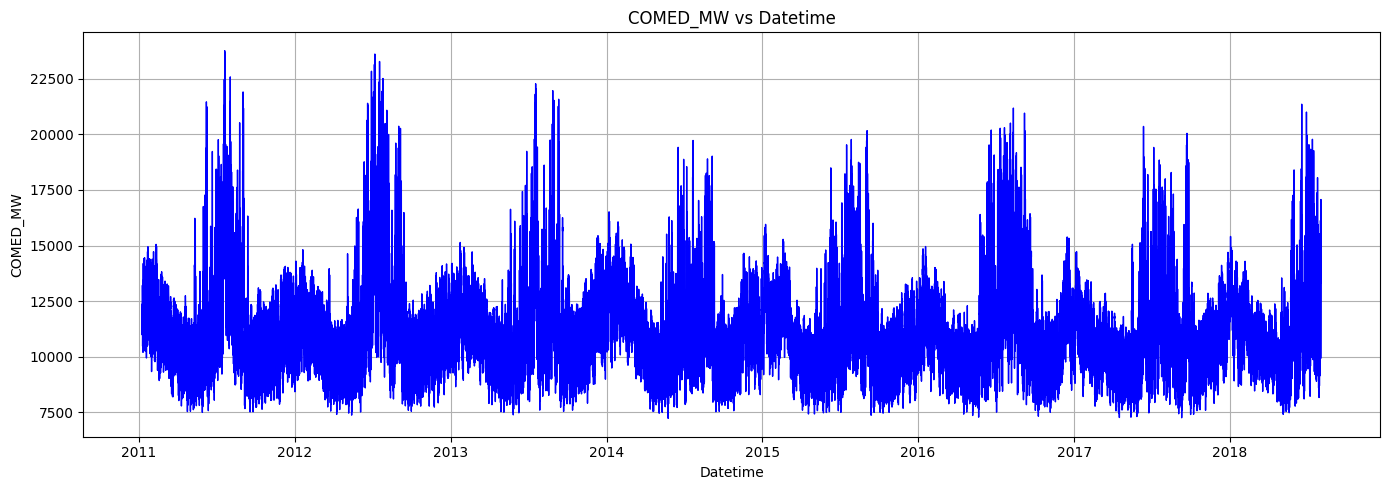

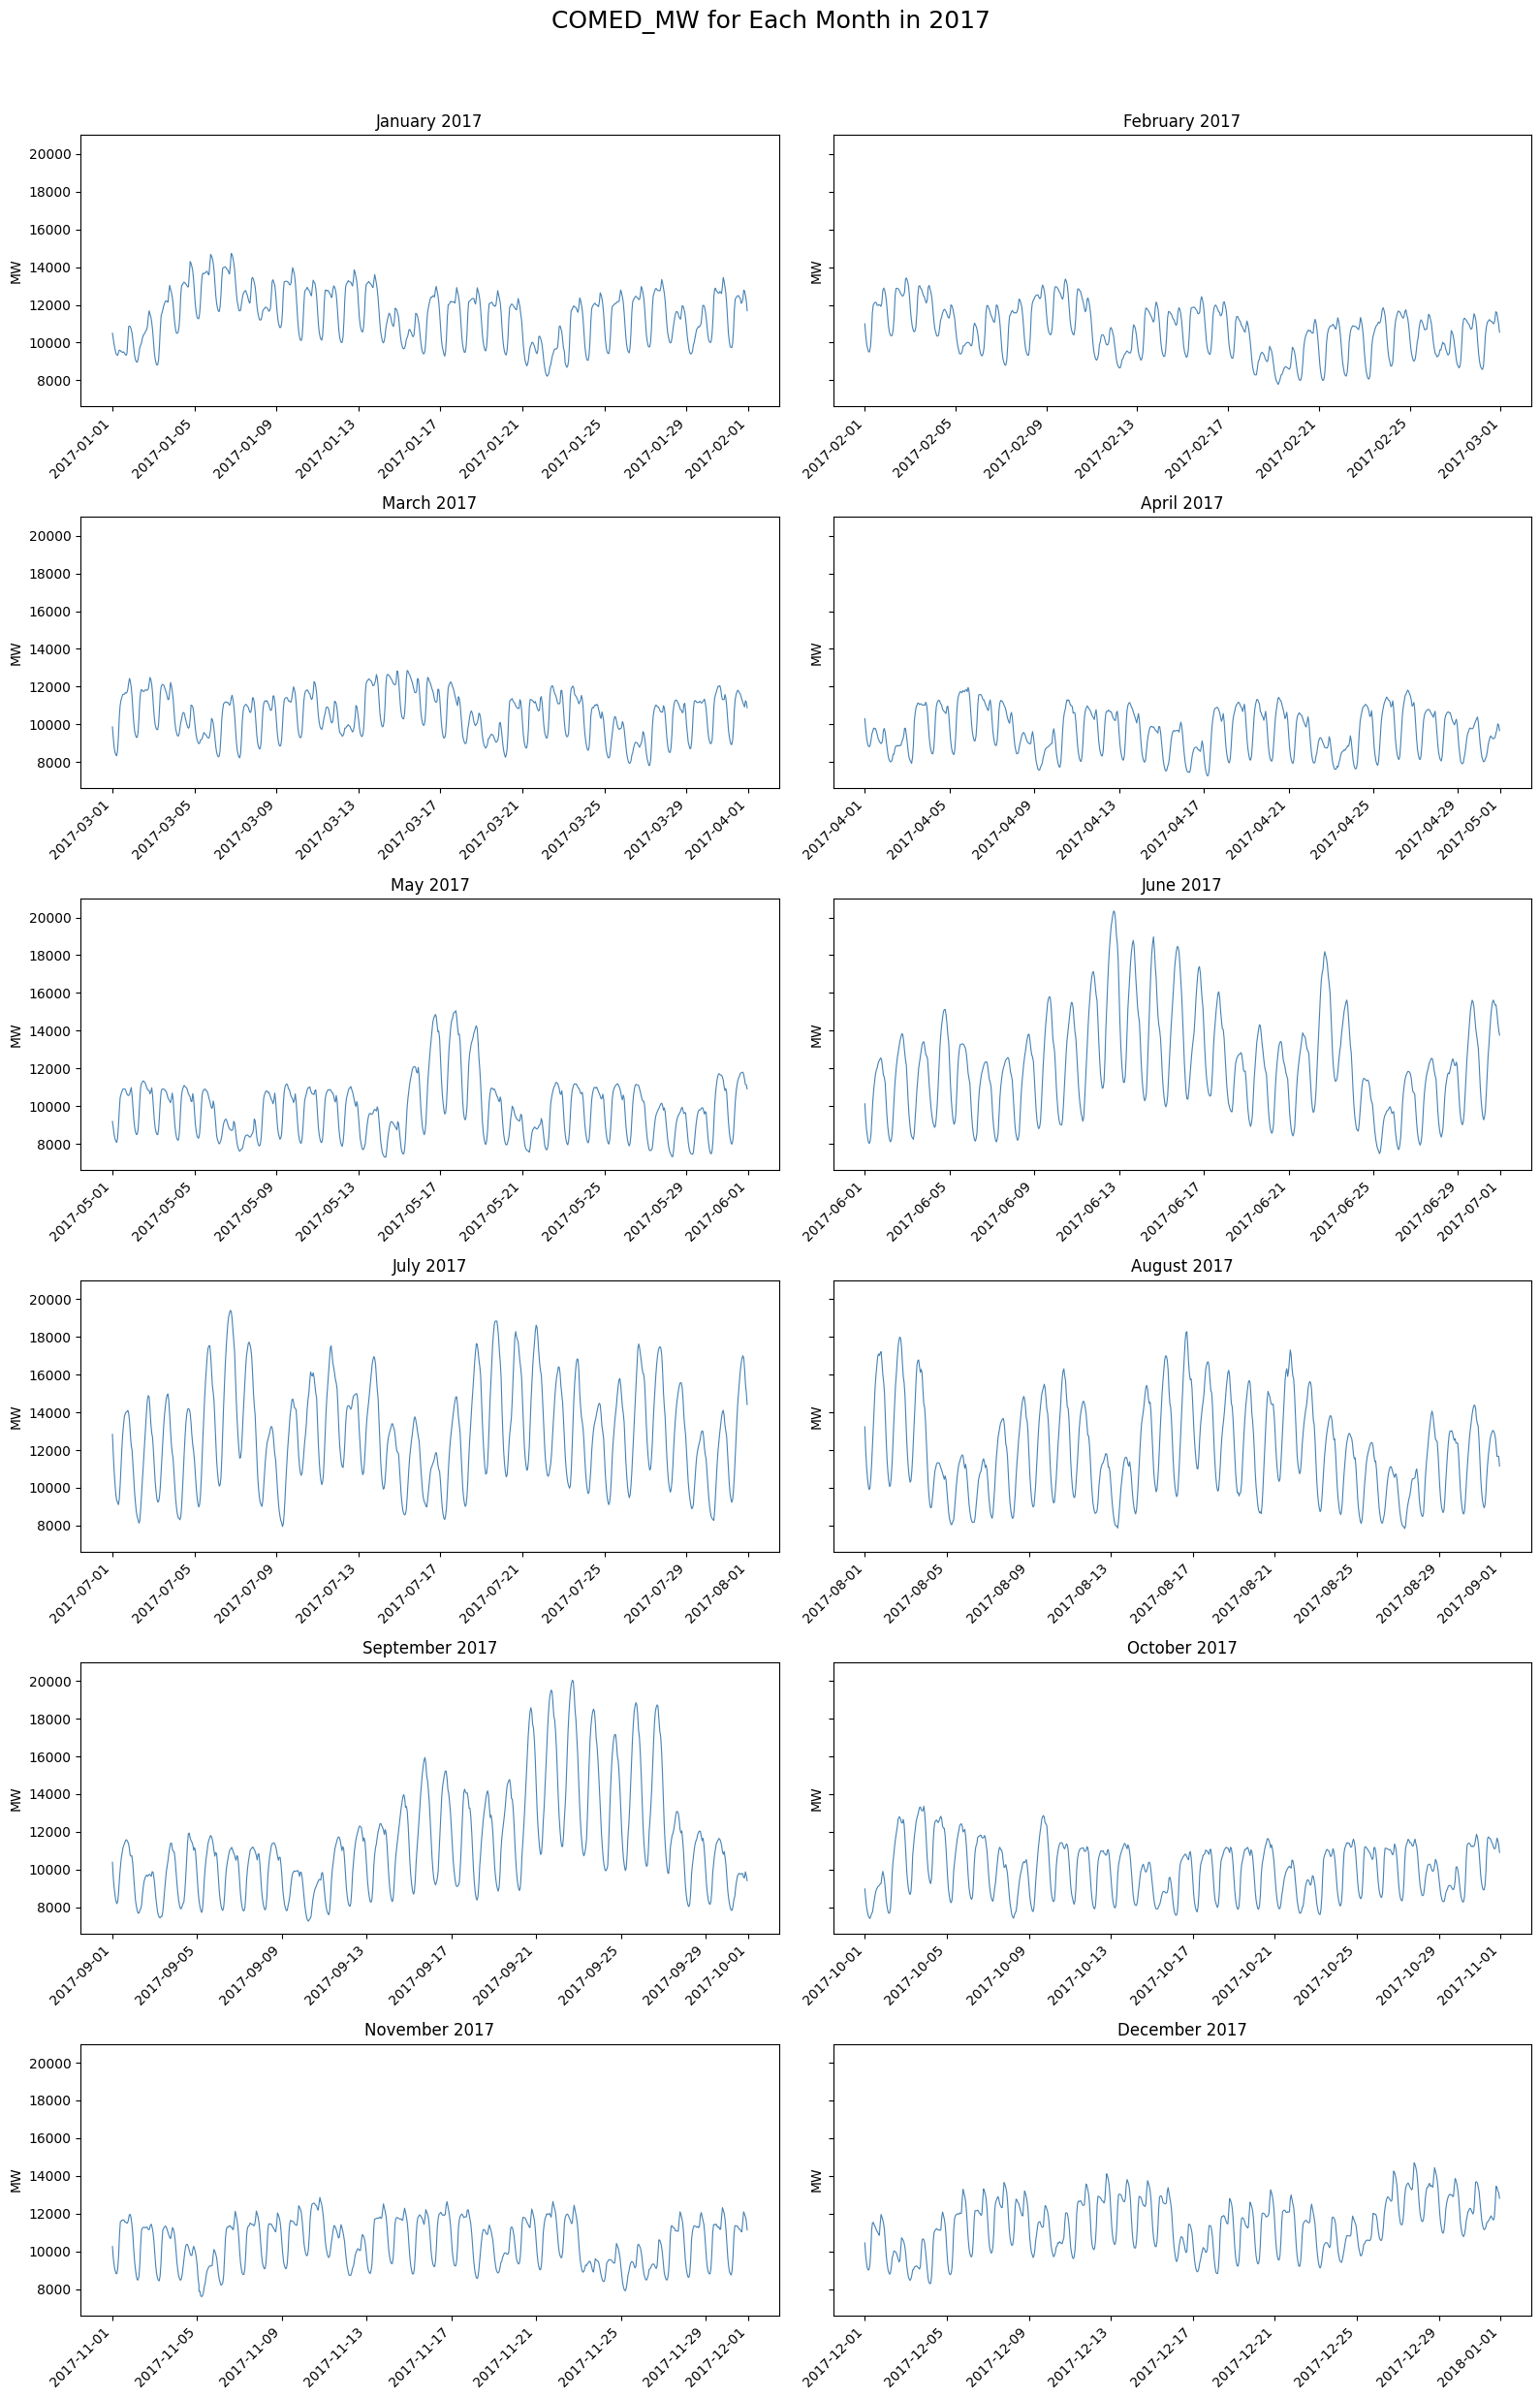

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with datetime parsing
df = pd.read_csv(
    'COMED_hourly.csv',
    parse_dates=['Datetime'],
    date_format='%Y-%m-%d %H:%M:%S'
)

# Sort by datetime and set as index
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

# Add time-based features
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Weekend'] = (df['DayOfWeek'] >= 5).astype(int)  # 1 for Saturday/Sunday, 0 for weekday
df['DayOfMonth'] = df.index.day
df['Quarter'] = df.index.quarter

# Add lag features
df['lag_1_hour'] = df['COMED_MW'].shift(1)
df['lag_1_day'] = df['COMED_MW'].shift(24)
df['lag_1_week'] = df['COMED_MW'].shift(168)

# Drop rows with NaN values caused by lagging
df = df.dropna()

# Save to new CSV file
df.to_csv('COMED_features_1.csv')

print("✅ Features added and saved to 'COMED_features_1.csv'")

# Plot historical COMED_MW vs Datetime
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['COMED_MW'], color='blue', linewidth=1)
plt.title('COMED_MW vs Datetime')
plt.xlabel('Datetime')
plt.ylabel('COMED_MW')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Subplots for each month in 2017 ---- #
# Filter data for year 2017 only
df_2017 = df.loc['2017']

# Setup a 6x2 grid for 12 months
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 26), sharey=True)
axes = axes.flatten()

# Plot each month in its own subplot
for month in range(1, 13):
    ax = axes[month - 1]
    monthly_data = df_2017[df_2017.index.month == month]
    ax.plot(monthly_data.index, monthly_data['COMED_MW'], color='steelblue', linewidth=0.8)
    ax.set_title(f'{monthly_data.index[0]:%B %Y}' if not monthly_data.empty else f'Month {month}')
    ax.set_ylabel('MW')
    
    # Rotate x-axis labels
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

# Hide any unused axes (just in case)
for i in range(12, len(axes)):
    fig.delaxes(axes[i])

# Layout adjustment
plt.suptitle('COMED_MW for Each Month in 2017', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

### Plots for average hourly, daily, monthly, and yearly energy consumption

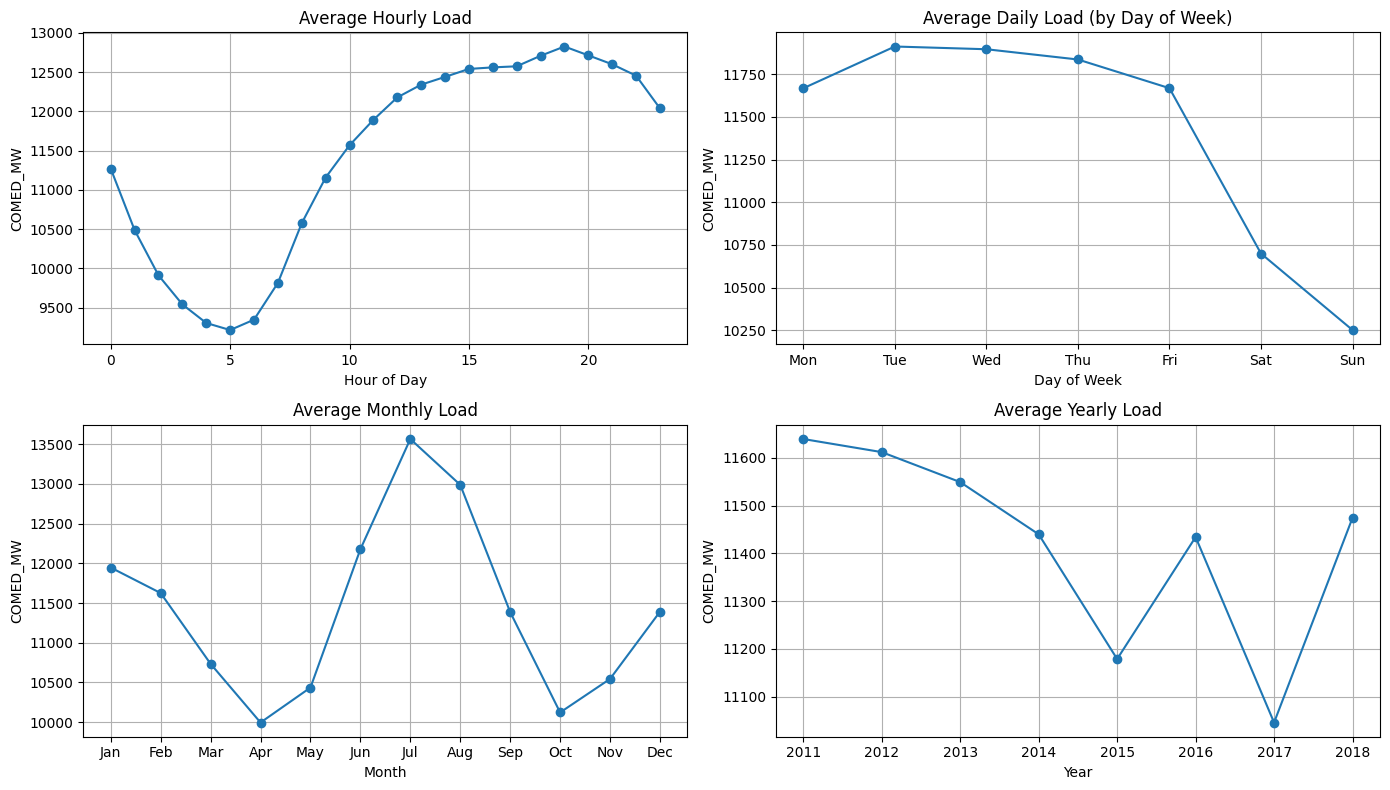

In [2]:
import matplotlib.pyplot as plt

# Ensure Datetime is the index
df = df.copy()
df.index = pd.to_datetime(df.index)

# --- Average Hourly Load ---
avg_hourly = df.groupby(df.index.hour)['COMED_MW'].mean()

# --- Average Daily Load (by Day of Week) ---
avg_daily = df.groupby(df.index.dayofweek)['COMED_MW'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_daily.index = days

# --- Average Monthly Load ---
avg_monthly = df.groupby(df.index.month)['COMED_MW'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_monthly.index = months

# --- Average Yearly Load ---
avg_yearly = df.groupby(df.index.year)['COMED_MW'].mean()

# --- Plot all in one figure ---
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Hourly
axs[0, 0].plot(avg_hourly.index, avg_hourly.values, marker='o')
axs[0, 0].set_title('Average Hourly Load')
axs[0, 0].set_xlabel('Hour of Day')
axs[0, 0].set_ylabel('COMED_MW')
axs[0, 0].grid(True)

# Daily
axs[0, 1].plot(avg_daily.index, avg_daily.values, marker='o')
axs[0, 1].set_title('Average Daily Load (by Day of Week)')
axs[0, 1].set_xlabel('Day of Week')
axs[0, 1].set_ylabel('COMED_MW')
axs[0, 1].grid(True)

# Monthly
axs[1, 0].plot(avg_monthly.index, avg_monthly.values, marker='o')
axs[1, 0].set_title('Average Monthly Load')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('COMED_MW')
axs[1, 0].grid(True)

# Yearly
axs[1, 1].plot(avg_yearly.index, avg_yearly.values, marker='o')
axs[1, 1].set_title('Average Yearly Load')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('COMED_MW')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

### Correlation matrix of features

                Hour  DayOfWeek     Month   Weekend  DayOfMonth   Quarter  \
Hour        1.000000   0.000204 -0.000224  0.000257   -0.000033 -0.000268   
DayOfWeek   0.000204   1.000000  0.001312  0.790713   -0.002574  0.000366   
Month      -0.000224   0.001312  1.000000  0.001199    0.004750  0.970776   
Weekend     0.000257   0.790713  0.001199  1.000000    0.000146  0.001557   
DayOfMonth -0.000033  -0.002574  0.004750  0.000146    1.000000  0.007297   
Quarter    -0.000268   0.000366  0.970776  0.001557    0.007297  1.000000   
lag_1_hour  0.411945  -0.206788 -0.012216 -0.253991   -0.004389 -0.010857   
lag_1_day   0.450587   0.039280 -0.012281 -0.063971   -0.003569 -0.011868   
lag_1_week  0.449487  -0.213595 -0.007323 -0.258607    0.024754 -0.010033   

            lag_1_hour  lag_1_day  lag_1_week  
Hour          0.411945   0.450587    0.449487  
DayOfWeek    -0.206788   0.039280   -0.213595  
Month        -0.012216  -0.012281   -0.007323  
Weekend      -0.253991  -0.063971   -

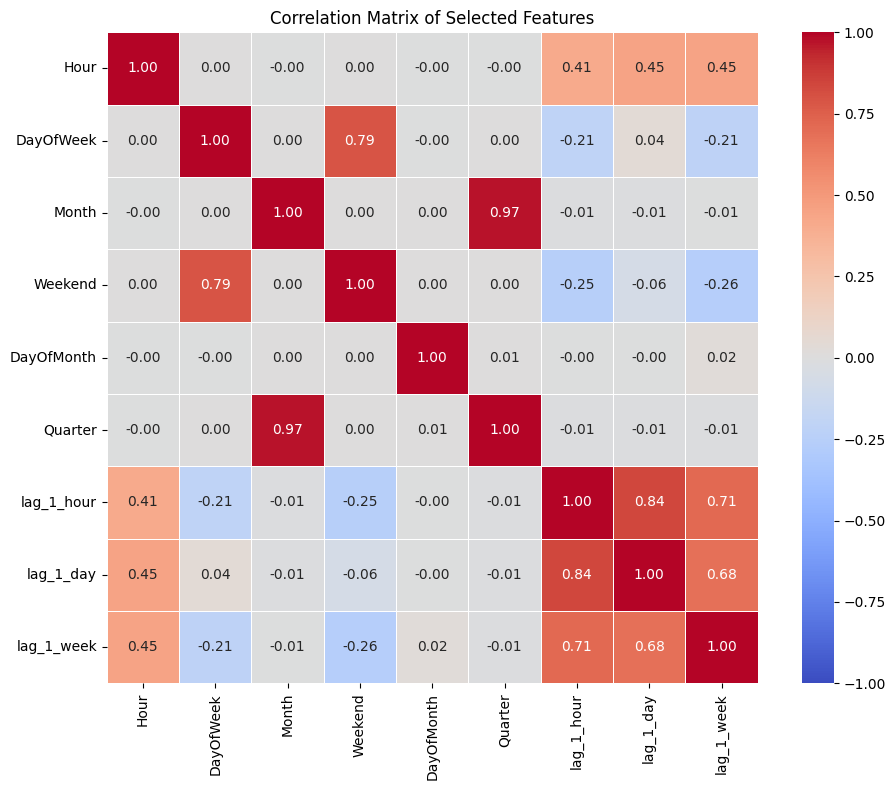

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with features
df = pd.read_csv('COMED_features_1.csv', parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)

# Select only the specified feature columns
features = ['Hour', 'DayOfWeek', 'Month', 'Weekend', 'DayOfMonth', 'Quarter', 'lag_1_hour', 'lag_1_day', 'lag_1_week']

feature_data = df[features].copy()

# Compute correlation matrix
corr = feature_data.corr()

print(corr)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()

### Feature reduction and save to CSV

In [4]:
import pandas as pd

# Load the CSV file with datetime parsing
df = pd.read_csv(
    'COMED_hourly.csv',
    parse_dates=['Datetime'],
    date_format='%Y-%m-%d %H:%M:%S'
)

# Sort by datetime and set as index
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

# Add time-based features
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
# df['Weekend'] = (df['DayOfWeek'] >= 5).astype(int)  # 1 for Saturday/Sunday, 0 for weekday
# df['DayOfMonth'] = df.index.day
# df['Quarter'] = df.index.quarter

# Add lag features
df['lag_1_hour'] = df['COMED_MW'].shift(1)
df['lag_1_day'] = df['COMED_MW'].shift(24)
df['lag_1_week'] = df['COMED_MW'].shift(168)

# Drop rows with NaN values caused by lagging
df = df.dropna()

# Save to new CSV file
df.to_csv('COMED_features.csv')

print("✅ Features added and saved to 'COMED_features.csv'")

✅ Features added and saved to 'COMED_features.csv'


### Correlation matrix of reduced features

                Hour  DayOfWeek     Month  lag_1_hour  lag_1_day  lag_1_week
Hour        1.000000   0.000204 -0.000224    0.411945   0.450587    0.449487
DayOfWeek   0.000204   1.000000  0.001312   -0.206788   0.039280   -0.213595
Month      -0.000224   0.001312  1.000000   -0.012216  -0.012281   -0.007323
lag_1_hour  0.411945  -0.206788 -0.012216    1.000000   0.840259    0.714683
lag_1_day   0.450587   0.039280 -0.012281    0.840259   1.000000    0.680897
lag_1_week  0.449487  -0.213595 -0.007323    0.714683   0.680897    1.000000


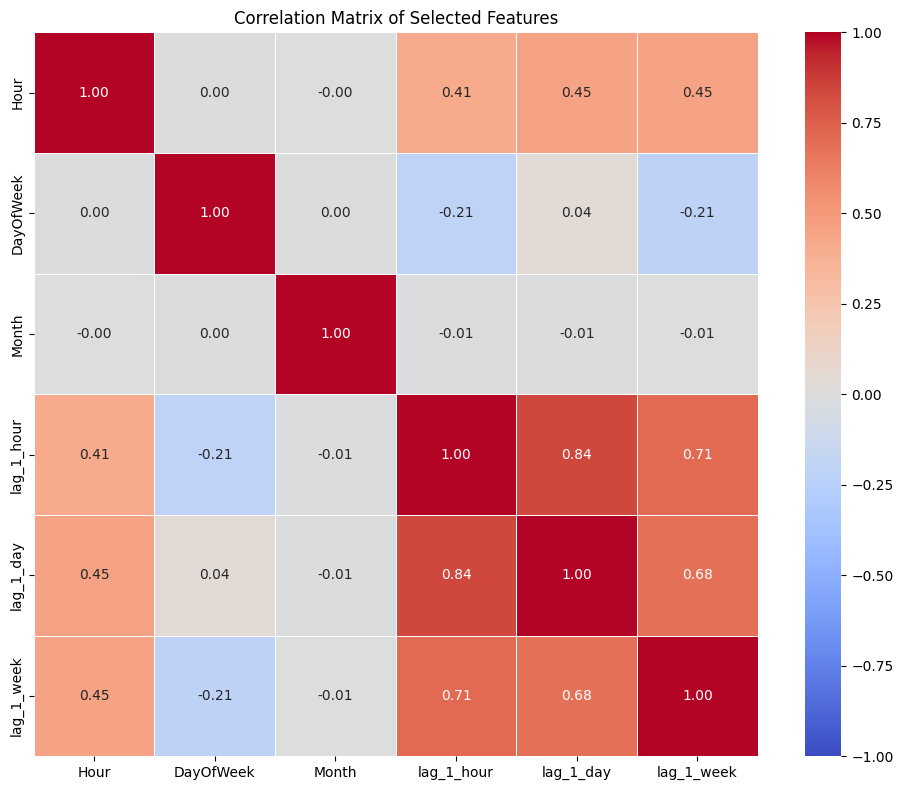

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with features
df = pd.read_csv('COMED_features.csv', parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)

# Select only the specified feature columns
features = ['Hour', 'DayOfWeek', 'Month', 'lag_1_hour', 'lag_1_day', 'lag_1_week']

feature_data = df[features].copy()

# Compute correlation matrix
corr = feature_data.corr()

print(corr)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()

### Box plots of hourly, daily, and monthly energy consumption

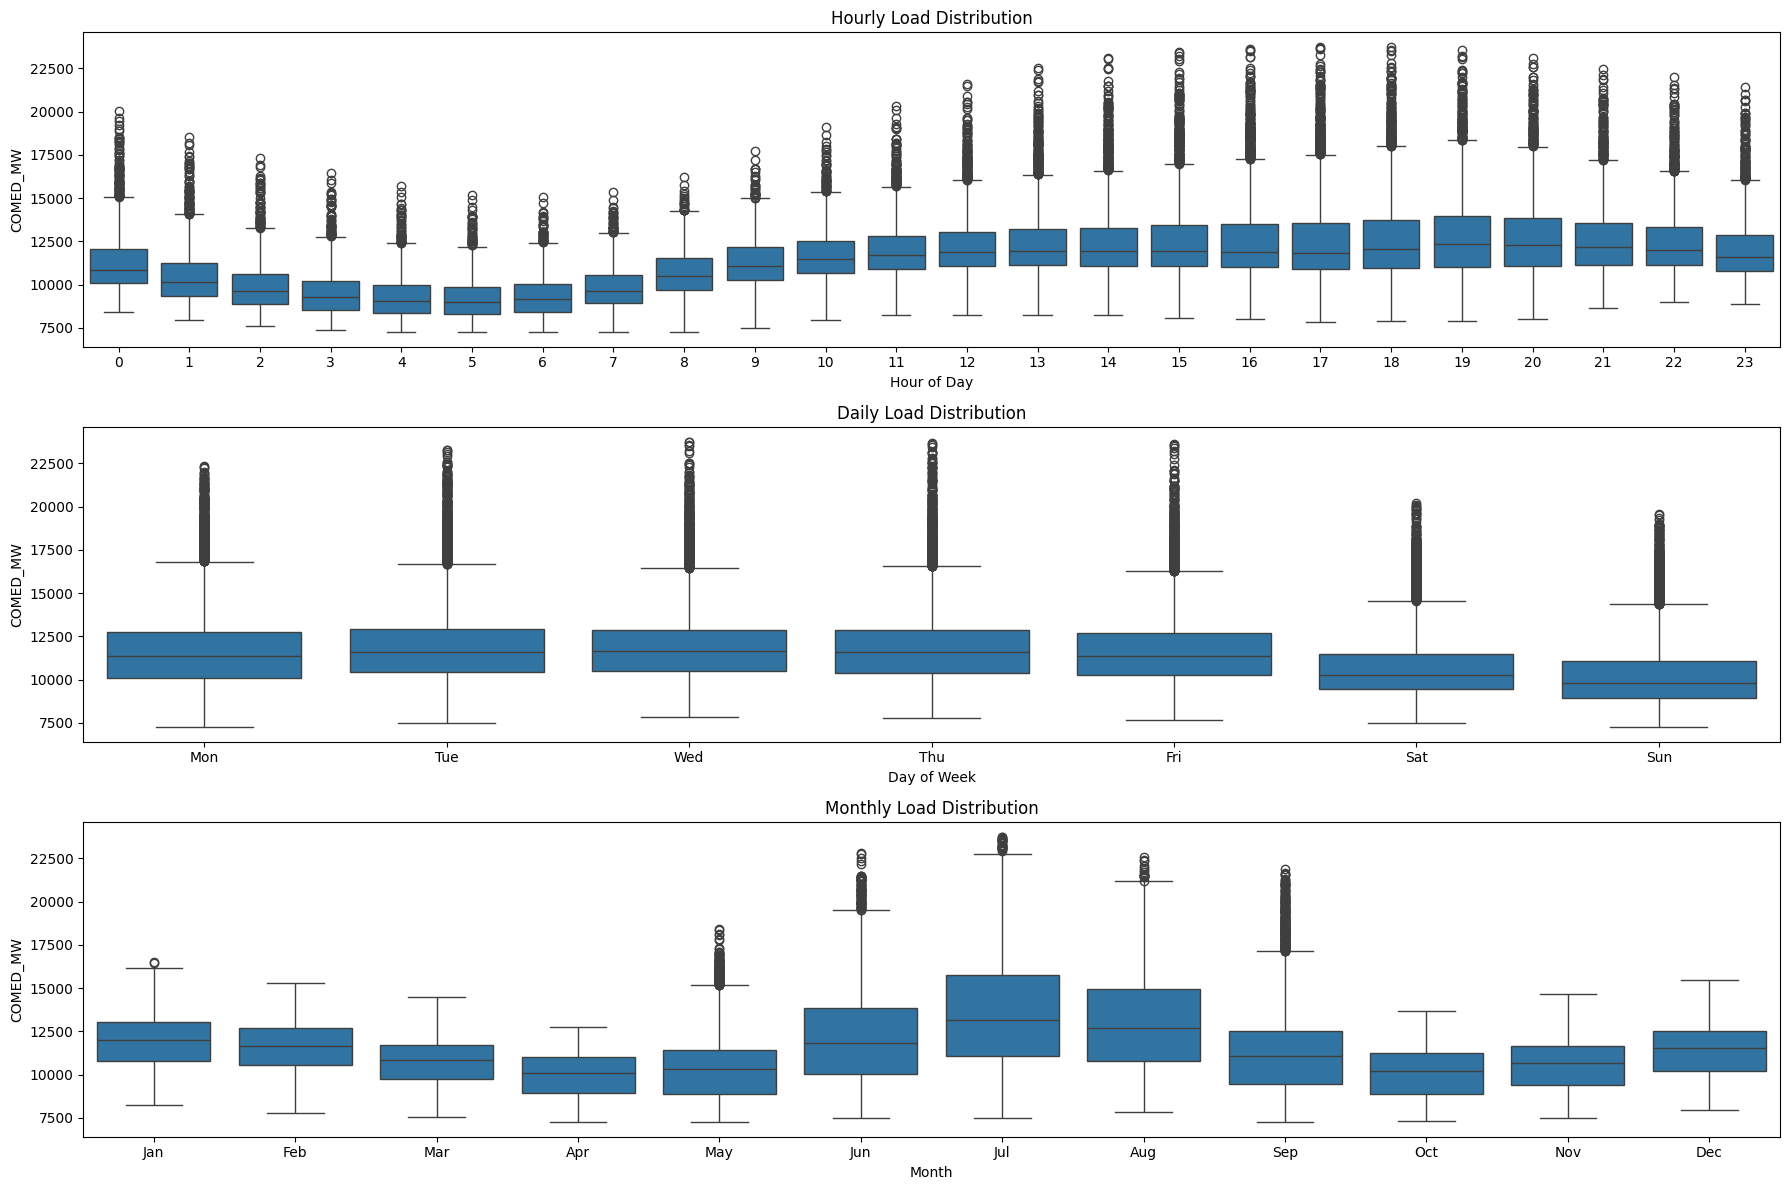

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime index
df = df.copy()
df.index = pd.to_datetime(df.index)

# Create time-based columns for plotting
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month

# For readable labels
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Map labels
df['DayOfWeekLabel'] = df['DayOfWeek'].map(dict(zip(range(7), days)))
df['MonthLabel'] = df['Month'].map(dict(zip(range(1, 13), months)))

# --- Plot setup ---
plt.figure(figsize=(18, 12))

# Hourly Box Plot
plt.subplot(3, 1, 1)
sns.boxplot(x='Hour', y='COMED_MW', data=df)
plt.title('Hourly Load Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('COMED_MW')

# Daily Box Plot
plt.subplot(3, 1, 2)
sns.boxplot(x='DayOfWeekLabel', y='COMED_MW', data=df, order=days)
plt.title('Daily Load Distribution')
plt.xlabel('Day of Week')
plt.ylabel('COMED_MW')

# Monthly Box Plot
plt.subplot(3, 1, 3)
sns.boxplot(x='MonthLabel', y='COMED_MW', data=df, order=months)
plt.title('Monthly Load Distribution')
plt.xlabel('Month')
plt.ylabel('COMED_MW')

plt.tight_layout()
plt.show()

### Heat maps of hourly-daily, daily-monthly, hourly-monthly energy consumption

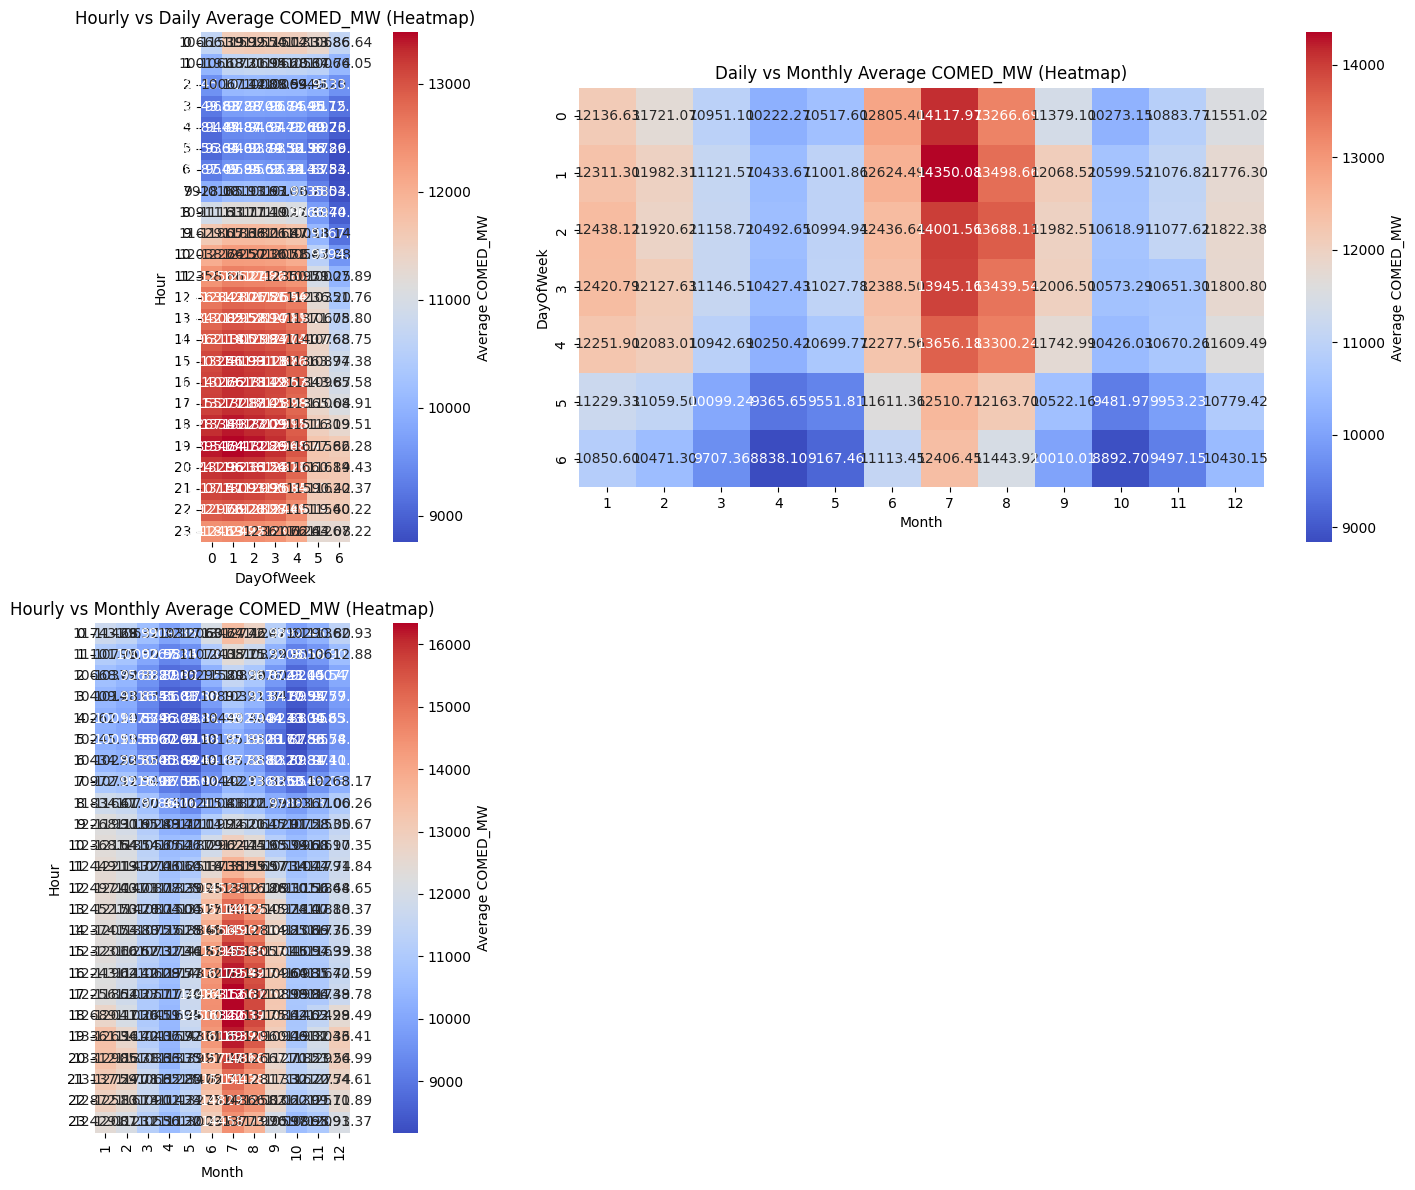

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Time-based features (if not already done)
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Year'] = df.index.year
df['DayLabel'] = df['DayOfWeek'].map(dict(zip(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])))
df['MonthLabel'] = df['Month'].map(dict(zip(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])))

# ── Data Aggregation ──
# Hourly vs Daily correlation of COMED_MW
hourly_daily_corr = df.groupby(['Hour', 'DayOfWeek'])['COMED_MW'].mean().unstack()
# Daily vs Monthly correlation of COMED_MW
daily_monthly_corr = df.groupby(['DayOfWeek', 'Month'])['COMED_MW'].mean().unstack()
# Hourly vs Monthly correlation of COMED_MW
hourly_monthly_corr = df.groupby(['Hour', 'Month'])['COMED_MW'].mean().unstack()

# ── Plotting ──
plt.figure(figsize=(18, 12))

# Heatmap: Hourly vs Daily
plt.subplot(2, 2, 1)
sns.heatmap(hourly_daily_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average COMED_MW'}, square=True)
plt.title('Hourly vs Daily Average COMED_MW (Heatmap)')

# Heatmap: Daily vs Monthly
plt.subplot(2, 2, 2)
sns.heatmap(daily_monthly_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average COMED_MW'}, square=True)
plt.title('Daily vs Monthly Average COMED_MW (Heatmap)')

# Heatmap: Hourly vs Monthly
plt.subplot(2, 2, 3)
sns.heatmap(hourly_monthly_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average COMED_MW'}, square=True)
plt.title('Hourly vs Monthly Average COMED_MW (Heatmap)')

plt.tight_layout()
plt.show()

### Heat maps without annotations

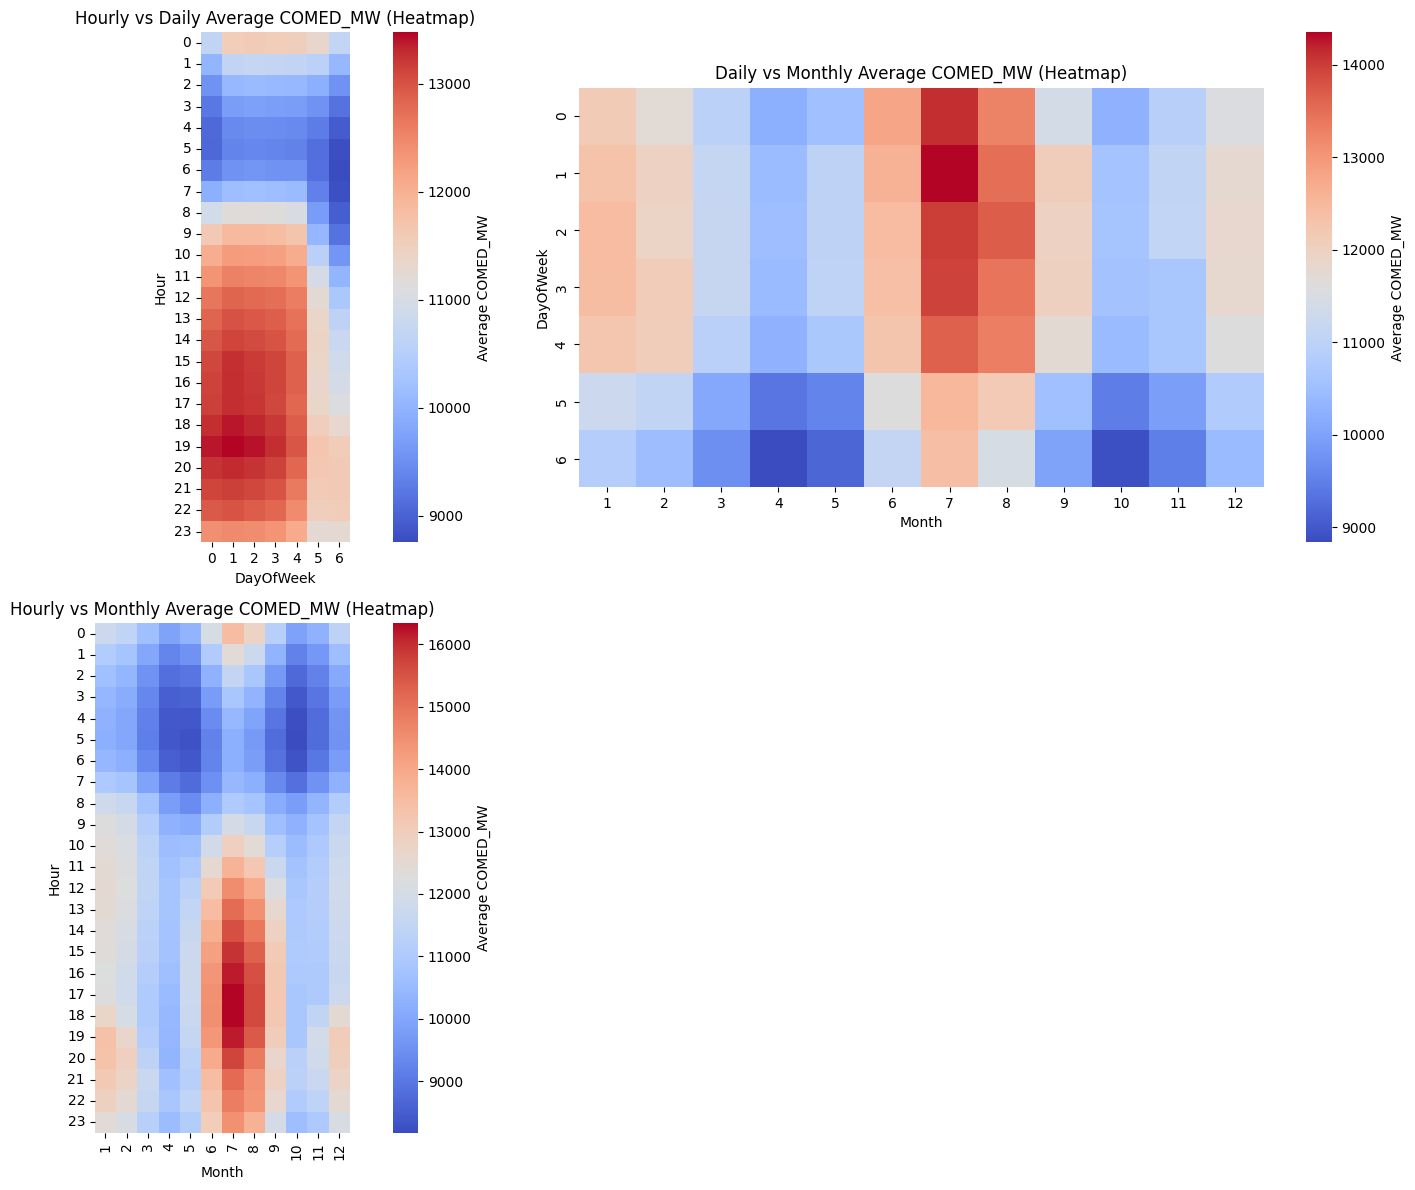

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Time-based features (if not already done)
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Year'] = df.index.year
df['DayLabel'] = df['DayOfWeek'].map(dict(zip(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])))
df['MonthLabel'] = df['Month'].map(dict(zip(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])))

# ── Data Aggregation ──
# Hourly vs Daily correlation of COMED_MW
hourly_daily_corr = df.groupby(['Hour', 'DayOfWeek'])['COMED_MW'].mean().unstack()
# Daily vs Monthly correlation of COMED_MW
daily_monthly_corr = df.groupby(['DayOfWeek', 'Month'])['COMED_MW'].mean().unstack()
# Hourly vs Monthly correlation of COMED_MW
hourly_monthly_corr = df.groupby(['Hour', 'Month'])['COMED_MW'].mean().unstack()

# ── Plotting ──
plt.figure(figsize=(18, 12))

# Heatmap: Hourly vs Daily
plt.subplot(2, 2, 1)
sns.heatmap(hourly_daily_corr, annot=False, cmap='coolwarm', cbar_kws={'label': 'Average COMED_MW'}, square=True)
plt.title('Hourly vs Daily Average COMED_MW (Heatmap)')

# Heatmap: Daily vs Monthly
plt.subplot(2, 2, 2)
sns.heatmap(daily_monthly_corr, annot=False, cmap='coolwarm', cbar_kws={'label': 'Average COMED_MW'}, square=True)
plt.title('Daily vs Monthly Average COMED_MW (Heatmap)')

# Heatmap: Hourly vs Monthly
plt.subplot(2, 2, 3)
sns.heatmap(hourly_monthly_corr, annot=False, cmap='coolwarm', cbar_kws={'label': 'Average COMED_MW'}, square=True)
plt.title('Hourly vs Monthly Average COMED_MW (Heatmap)')

plt.tight_layout()
plt.show()

### Data training and validating with time series split, grid search, and direct prediction for next 24 hours

Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.8}
✅ Best MAE: 102.49


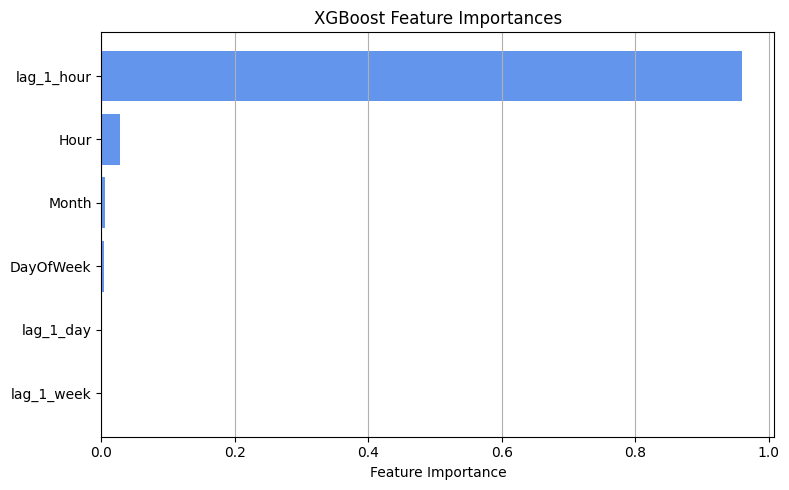

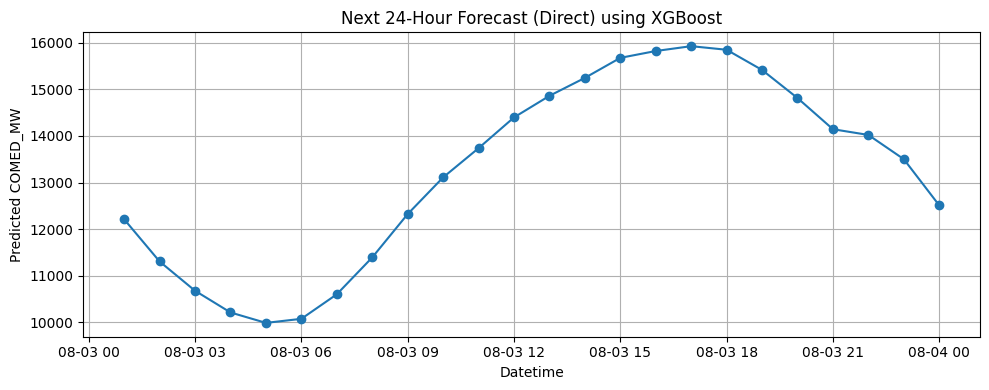

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
import xgboost as xgb
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('COMED_features.csv', parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)

# 2. Define features and target
features = ['Hour', 'DayOfWeek', 'Month', 'lag_1_hour', 'lag_1_day', 'lag_1_week']
X = df[features]
y = df['COMED_MW']

# 3. TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# 4. Define model and parameter grid
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 9],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# 5. Use MAE as the scoring metric
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 6. Grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=tscv,
    scoring=scorer,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X, y)

# 7. Results
print(f"\n✅ Best Parameters: {grid_search.best_params_}")
print(f"✅ Best MAE: {-grid_search.best_score_:.2f}")

# 8. Train final model with best params
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# 8.1 Plot feature importances
importances = best_model.feature_importances_
feature_names = features

# Sort by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(8, 5))
plt.barh(sorted_features, sorted_importances, color='cornflowerblue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# 9. Forecast next 24 hours
last_row = df.iloc[-1]
future_predictions = []
lag_1_hour = last_row['COMED_MW']
lag_1_day = df['COMED_MW'].iloc[-24]
lag_1_week = df['COMED_MW'].iloc[-168]

for i in range(1, 25):  # next 24 hours
    next_time = last_row.name + pd.Timedelta(hours=i)
    row = pd.DataFrame(index=[next_time])
    row['Hour'] = next_time.hour
    row['DayOfWeek'] = next_time.dayofweek
    row['Month'] = next_time.month
    row['lag_1_hour'] = lag_1_hour
    row['lag_1_day'] = lag_1_day
    row['lag_1_week'] = lag_1_week

    pred = best_model.predict(row[features])[0]
    future_predictions.append(pred)

    lag_1_hour = pred
    lag_1_day = df['COMED_MW'].iloc[-24 + i]
    lag_1_week = df['COMED_MW'].iloc[-168 + i]

# 10. Plot forecast
future_index = pd.date_range(start=last_row.name + pd.Timedelta(hours=1), periods=24, freq='h')
plt.figure(figsize=(10, 4))
plt.plot(future_index, future_predictions, marker='o')
plt.title("Next 24-Hour Forecast (Direct) using XGBoost")
plt.xlabel("Datetime")
plt.ylabel("Predicted COMED_MW")
plt.grid(True)
plt.tight_layout()
plt.show()

### Data training and validating with time series split, and recursive (not recommended) prediction for next 24 hours

Fold 1 MAE: 118.23
Fold 2 MAE: 111.88
Fold 3 MAE: 87.26
Fold 4 MAE: 96.45
Fold 5 MAE: 100.23

Average MAE across folds: 102.81


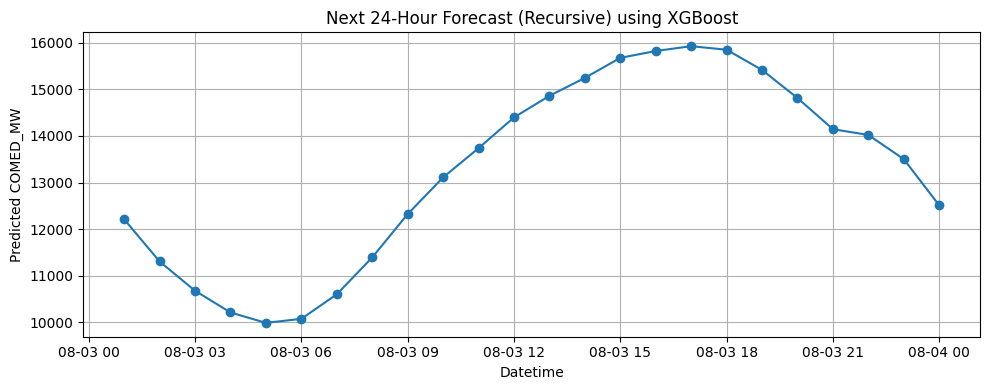

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('COMED_features.csv', parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)

# 3. Define features and target
features = ['Hour', 'DayOfWeek', 'Month', 'lag_1_hour', 'lag_1_day', 'lag_1_week']
X = df[features]
y = df['COMED_MW']

# 4. TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=1,
    random_state=42
)

mae_scores = []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)
    print(f"Fold {fold + 1} MAE: {mae:.2f}")

print(f"\nAverage MAE across folds: {np.mean(mae_scores):.2f}")

# 6. Train final model on full data
model.fit(X, y)

# Start with last known values
last_known = df.copy()
future_predictions = []

for i in range(1, 25):  # Next 24 hours
    next_time = last_known.index[-1] + pd.Timedelta(hours=1)
    row = pd.DataFrame(index=[next_time])

    # Time-based features
    row['Hour'] = next_time.hour
    row['DayOfWeek'] = next_time.dayofweek
    row['Month'] = next_time.month

    # Recursive lags (may include predicted values from earlier in this loop)
    comed_series = last_known['COMED_MW']
    row['lag_1_hour'] = comed_series.iloc[-1]
    row['lag_1_day'] = comed_series.iloc[-24] if len(comed_series) >= 24 else np.nan
    row['lag_1_week'] = comed_series.iloc[-168] if len(comed_series) >= 168 else np.nan

    # If any lag is NaN due to insufficient history, fallback to the last known real value
    row.fillna(last_known['COMED_MW'].iloc[-1], inplace=True)

    # Predict and append
    pred = model.predict(row[features])[0]
    row['COMED_MW'] = pred
    last_known = pd.concat([last_known, row])
    future_predictions.append(pred)

# Plot recursive 24-hour forecast
future_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=24, freq='h')
plt.figure(figsize=(10, 4))
plt.plot(future_index, future_predictions, marker='o')
plt.title("Next 24-Hour Forecast (Recursive) using XGBoost")
plt.xlabel("Datetime")
plt.ylabel("Predicted COMED_MW")
plt.grid(True)
plt.tight_layout()
plt.show()